# Locally weighted Regression:

In [50]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# # def lowess(x, y, f=2. / 3., iter=3):
# #     """lowess(x, y, f=2./3., iter=3) -> yest
# #     Lowess smoother: Robust locally weighted regression.
# #     The lowess function fits a nonparametric regression curve to a scatterplot.
# #     The arrays x and y contain an equal number of elements; each pair
# #     (x[i], y[i]) defines a data point in the scatterplot. The function returns
# #     the estimated (smooth) values of y.
# #     The smoothing span is given by f. A larger value for f will result in a
# #     smoother curve. The number of robustifying iterations is given by iter. The
# #     function will run faster with a smaller number of iterations.
#     """
# #     n = len(x)
# #     r = int(ceil(f * n))
# #     h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
# #     w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
# #     w = (1 - w ** 3) ** 3
# #     yest = np.zeros(n)
# #     delta = np.ones(n)
# #     for iteration in range(iter):
# #         for i in range(n):
# #             weights = delta * w[:, i]
# #             b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
# #             A = np.array([[np.sum(weights), np.sum(weights * x)],
# #                           [np.sum(weights * x), np.sum(weights * x * x)]])
# #             beta = linalg.solve(A, b)
# #             yest[i] = beta[0] + beta[1] * x[i]

# #         residuals = y - yest
# #         s = np.median(np.abs(residuals))
# #         delta = np.clip(residuals / (6.0 * s), -1, 1)
# #         delta = (1 - delta ** 2) ** 2

# #     return yest

In [52]:
def lowess(x, y, f=2. / 3., iter=3):
    """Robust locally weighted regression.

    Inputs:
       - x, y: dataset
       - f: smoothing parameter
       - iter: number of robustifying iterations
    """
    n = len(x)
    r = int(math.ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    y_pred = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = np.linalg.solve(A, b)
            y_pred[i] = beta[0] + beta[1] * x[i]

        residuals = y - y_pred
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return y_pred

In [53]:
n = 100
x = np.linspace(0, 2*math.pi, n)
y = np.sin(x) + 0.6 *np.random.rand(n)

In [58]:
y_pred = lowess(x, y, f=0.5, iter=3) # 0<F-num<1 , larrger=smoother, smaller=more zigzaki

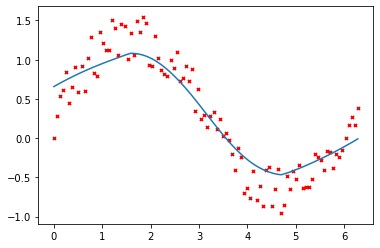

In [59]:
plt.scatter(x, y, s=10, c='r', marker= 'x')
plt.plot(x, y_pred)
plt.show()
